Каирова Екатерина ТФэ-01-21
Домашняя работа 6

Определить собственные частоты колебаний пакета лопаток в динамических условиях и построить вибрационную диаграмму для А0, A1, B0 форм колебаний на одном графике и сделать вывод. Средний диаметр ступени 1.25 м. Длинна рабочей лопатки 0.15 м. Площадь сечения лопатки 19.44 * 10е-4 м2. Момент инерции 1.43 * 10e-8 м4 
 = 75. Плотность стали 12Х13 8000 кг/м3. Модуль упругости Е=2 * 10е11 Па. Число рабочих лопаток z=84. Размер бандажной ленты 60 х 5 мм. Число лопаток в пакете m = 8. Шаг по бандажу = 25 мм.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mm = 1e-3

In [3]:
m = 8
t = 25 * mm
beta = 75
density = 8000
E = 2 * (10**11)
z = 84
D_cp = 1.25
L = 0.15
F = 19.44 * (10 ** (-4))
J = 1.43 * (10 ** (-8))
delta = 5 * mm
B = 60 * mm

In [4]:
_lambda = L / (J / F) ** 0.5
_lambda

55.30588810191244

In [5]:
psi = 0.99

In [16]:
def static_frequency(i):
    _m = {
        1: 0.56,
        2: 3.51,
        3: 9.82
         }
    first = psi * _m[i] / (L ** 2)
    second = ((E * J) / (density * F)) ** 0.5
    return first * second

In [17]:
static_frequency(1), static_frequency(2), static_frequency(3)

(334.14163725111536, 2094.3520477703837, 5859.412281796345)

In [18]:
## примем что бандаж приклепан к перу лопаток
H = 0.1
J_b = B * (delta ** 3) / 12

k = (12 * (m - 1) * H * E * J_b * L * np.sin(np.deg2rad(beta)) ** 2) / (m * t * J * E)
k

0.2569047212378052

In [19]:
nu = B * delta * t / (F * L)
nu

0.025720164609053492

In [20]:
f_a0 = static_frequency(1) * 1.05
f_a1 = static_frequency(1) * 6.2
f_b0 = static_frequency(1) * 4.3

f_a0, f_a1, f_b0  # Гц

(350.84871911367117, 2071.6781509569155, 1436.809040179796)

In [21]:
B_bandage = 0.5 * ((D_cp/L) - 1) * ((nu+1/2)/(nu+1/3)) + np.sin(np.deg2rad(beta)) ** 2
B_bandage

6.301685099217912

In [22]:
def to_dynamic_frequency(F, n=50):
    root = (1 + B_bandage * (n / F) ** 2) ** 0.5
    return F * root

In [23]:
to_dynamic_frequency(f_a0), to_dynamic_frequency(f_a1), to_dynamic_frequency(f_b0)

(372.6245247588361, 2075.4769509441217, 1442.2809818792007)

In [24]:
def min_max(F, delta=0.05):
    return F * (1-delta) , F * (1 + delta)

In [25]:
n_line = np.linspace(0, 60)
min_line_A0, max_line_A0 = min_max(to_dynamic_frequency(f_a0, n=n_line))
min_line_A1, max_line_A1 = min_max(to_dynamic_frequency(f_a1, n=n_line))
min_line_B0, max_line_B0 = min_max(to_dynamic_frequency(f_b0, n=n_line))

In [26]:
def k_line(k, n=n_line):
    return k * n_line

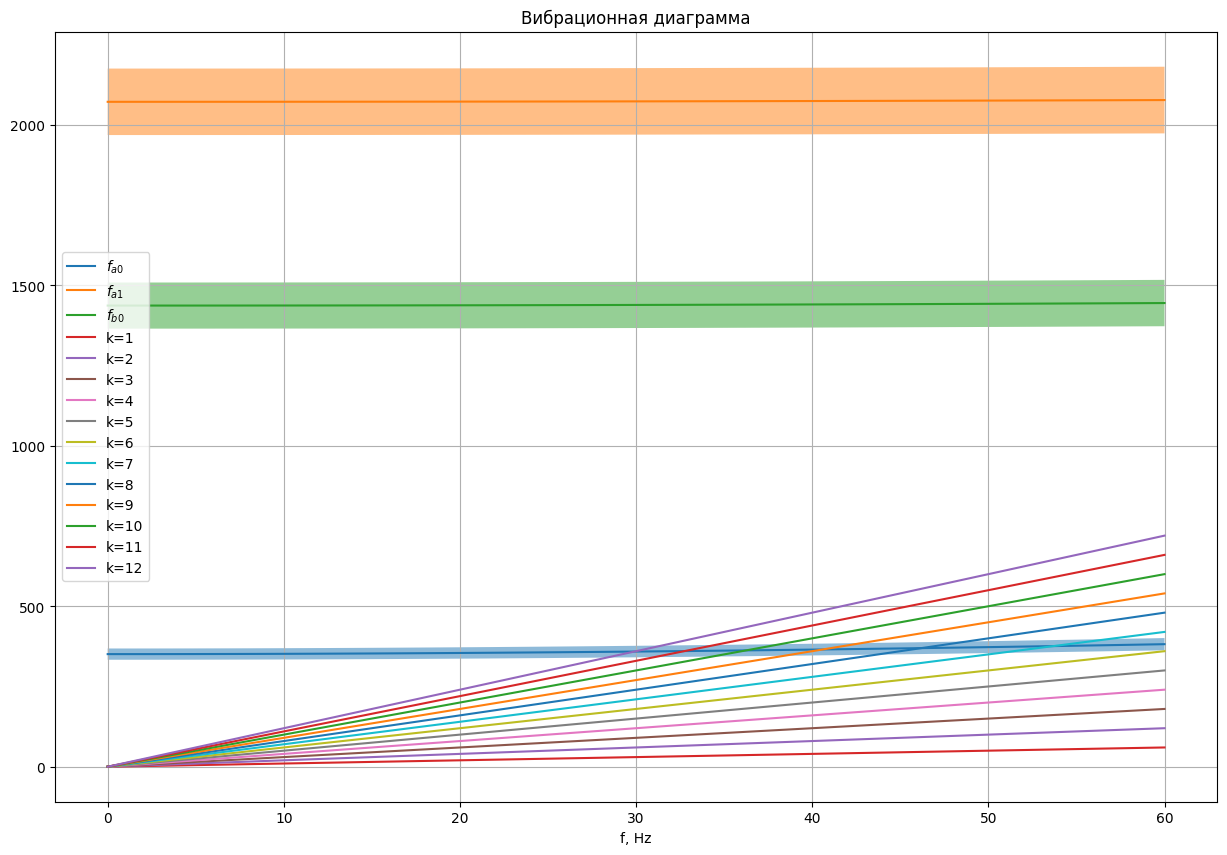

In [27]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

#A0
ax.plot(n_line, to_dynamic_frequency(f_a0, n=n_line), label='$f_{a0}$')
ax.fill_between(n_line, y1=min_line_A0, y2=max_line_A0, alpha=0.5)

#A1
ax.plot(n_line, to_dynamic_frequency(f_a1, n=n_line), label='$f_{a1}$')
ax.fill_between(n_line, y1=min_line_A1, y2=max_line_A1, alpha=0.5)

#В0
ax.plot(n_line, to_dynamic_frequency(f_b0, n=n_line), label='$f_{b0}$')
ax.fill_between(n_line, y1=min_line_B0, y2=max_line_B0, alpha=0.5)

ax.plot(n_line, k_line(1), label=f'k={1}')
ax.plot(n_line, k_line(2), label=f'k={2}')
ax.plot(n_line, k_line(3), label=f'k={3}')
ax.plot(n_line, k_line(4), label=f'k={4}')
ax.plot(n_line, k_line(5), label=f'k={5}')
ax.plot(n_line, k_line(6), label=f'k={6}')
ax.plot(n_line, k_line(7), label=f'k={7}')
ax.plot(n_line, k_line(8), label=f'k={8}')
ax.plot(n_line, k_line(9), label=f'k={9}')
ax.plot(n_line, k_line(10), label=f'k={10}')
ax.plot(n_line, k_line(11), label=f'k={11}')
ax.plot(n_line, k_line(12), label=f'k={12}')
ax.set_xlabel("n, rps")
ax.set_xlabel("f, Hz")
ax.grid()
ax.legend()
ax.set_title("Вибрационная диаграмма");

# Вывод:
### 1. Резонанс при форме колебаний лопаток типа А0,когда все лопатки колеблются в одной фазе, более опасен при низких частотах, чем для типа В0, когда не все лопатки колеблются в одной фазе, так как собственная частота при А0 меньше и линии попадают в зону опасную для работы лопаточного аппарата

### 2. Резонанс при форме колебаний лопаток типа А0 более опасен при низких частотах, чем для типа А1, так как собственная частота при первой форме колебаний меньше, чем при второй, и линии попадают в зону опасную для работы лопаточного аппарата
